In [1]:
from sckinetics import high_resolution_raw, simulate, kinetics_inference
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Mono-kinetic
gene=simulate(kinetic_type='mono',
              alpha1=1,
              alpha2=0,
              beta1=1,
              beta2=1,
              gamma1=1,
              gamma2=1,
              path1_pct=99,
              path2_pct=99,
              path1_cell_number=500,
              path2_cell_number=500,
              noise_level=0.)

u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.9899940613860503 u_end 0.009899940613860504
t1 and t2: 0.0 4.609496379596168
0 1 1


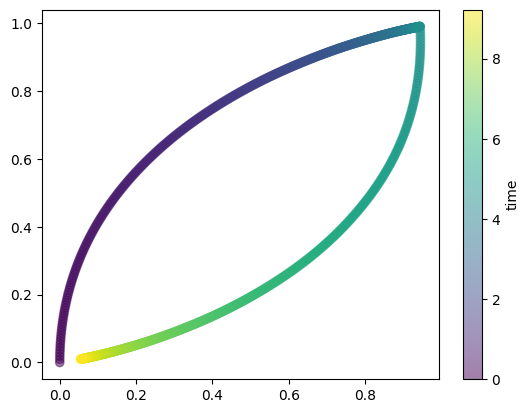

In [3]:
gene['t'] = np.concatenate((np.linspace(0.0, 4.609, 500), np.linspace(4.609, 4.609+4.609, 500)))
plt.scatter(gene.splice,gene.unsplice,c=gene.t,cmap='viridis',alpha=0.5)
plt.colorbar(label='time')

In [4]:
embedding_array = np.concatenate([gene.embedding1.values.reshape(-1,1), gene.embedding2.values.reshape(-1,1)],axis=1)
from sklearn.neighbors import NearestNeighbors
# Initialize and fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=10)
knn_model.fit(embedding_array)

# Compute the k-nearest neighbors graph
knn_graph = knn_model.kneighbors_graph(embedding_array)

# Convert the sparse matrix to a dense format for display
adj = knn_graph.toarray()

alpha, beta, gamma = high_resolution_raw(u=gene.unsplice.values.reshape(-1,1),
                                         s=gene.splice.values.reshape(-1,1),
                                         t=gene.t.values,
                                         adj=adj,
                                         optimizer='scipy')

100%|██████████| 1000/1000 [01:04<00:00, 15.48it/s]


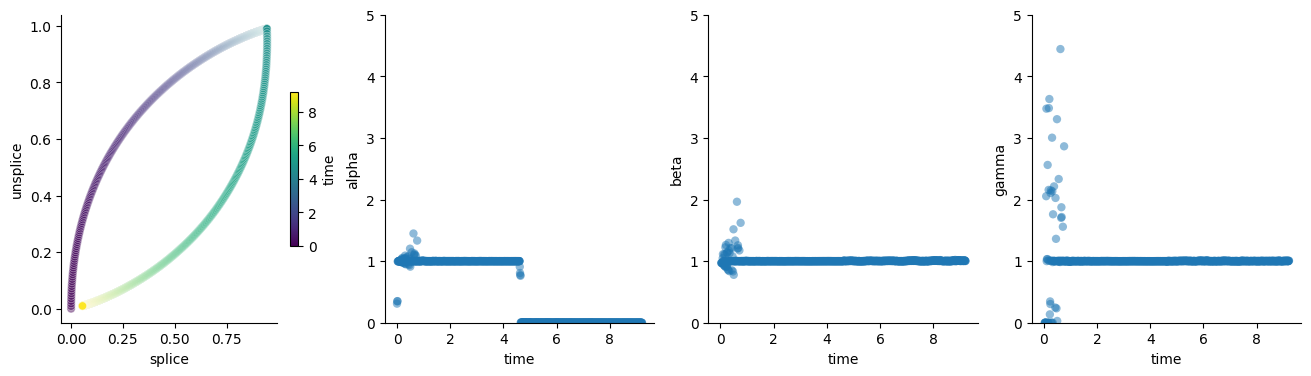

In [6]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.scatterplot(x=gene.splice,
                y=gene.unsplice,
                c=gene.t, alpha=0.5, cmap='viridis', ax=axes[0])
axes[0].set_ylabel('unsplice')
axes[0].set_xlabel('splice')
# axes[0].colorbar(label='time',loc='upper center')
# axes[0].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=alpha.reshape(-1),
                alpha=0.5,
                edgecolor='none',
                ax=axes[1])
axes[1].set_ylabel('alpha')
axes[1].set_xlabel('time')
axes[1].set_ylim([0, 5])
# axes[1].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=beta.reshape(-1),
                alpha=0.5, edgecolor='none', ax=axes[2])
axes[2].set_ylabel('beta')
axes[2].set_xlabel('time')
axes[2].set_ylim([0, 5])
# axes[2].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=gamma.reshape(-1),
                alpha=0.5, edgecolor='none', ax=axes[3])
axes[3].set_ylabel('gamma')
axes[3].set_xlabel('time')
axes[3].set_ylim([0, 5])
# axes[3].get_legend().remove()

    # Remove top and right spines
for j in range(4):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()


norm = mpl.colors.Normalize(vmin=gene.t.min(), vmax=gene.t.max())
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add the color bar
cbar = fig.colorbar(sm, ax=axes[0],shrink=0.5)
cbar.set_label('time')

# fig.suptitle('normal')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.savefig("simu_normal_cbar.pdf", format='pdf',bbox_inches='tight')
plt.show()

u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.9899940613860503 u_end 3.3979988122772102
t1 and t2: 0.0 3.2215129853806515
2 0.5 0.5


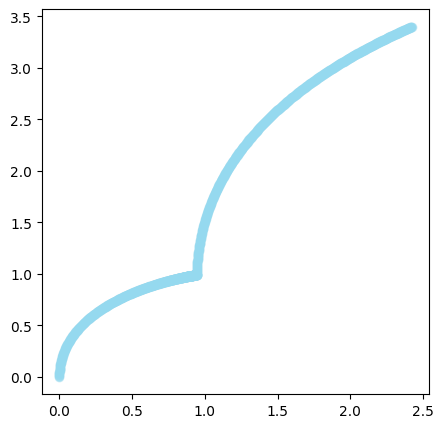

In [39]:
plt.figure(figsize=(5,5))
gene=simulate(kinetic_type='tran_boost',
              alpha1=1,
              alpha2=2,
              beta1=1,
              beta2=0.5,
              gamma1=1,
              gamma2=0.5,
              path1_pct=99,
              path2_pct=80,
              path1_cell_number=500,
              path2_cell_number=500,
              noise_level=0.)
plt.scatter(gene.splice,gene.unsplice,c='#95D9EF',alpha=0.5)

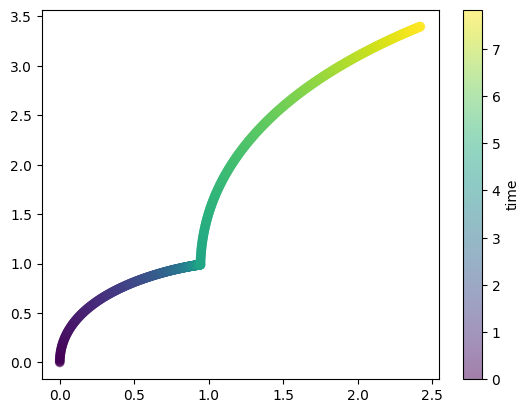

In [40]:
gene['t'] = np.concatenate((np.linspace(0.0, 4.609390362976085, 500), np.linspace(4.609390362976085,4.609390362976085+3.2215129853806515, 500)))
plt.scatter(gene.splice,gene.unsplice,c=gene.t,cmap='viridis',alpha=0.5)
plt.colorbar(label='time')

In [41]:
embedding_array = np.concatenate([gene.embedding1.values.reshape(-1,1), gene.embedding2.values.reshape(-1,1)],axis=1)
from sklearn.neighbors import NearestNeighbors
# Initialize and fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=10)
knn_model.fit(embedding_array)

# Compute the k-nearest neighbors graph
knn_graph = knn_model.kneighbors_graph(embedding_array)

# Convert the sparse matrix to a dense format for display
adj = knn_graph.toarray()

# adj = np.logical_and(adj, adj.T).astype(int)

In [42]:
alpha, beta, gamma = high_resolution_raw(u=gene.unsplice.values.reshape(-1,1),
                                         s=gene.splice.values.reshape(-1,1),
                                         t=gene.t.values,
                                         adj=adj,
                                         optimizer='scipy')

100%|██████████| 1000/1000 [00:04<00:00, 234.34it/s]


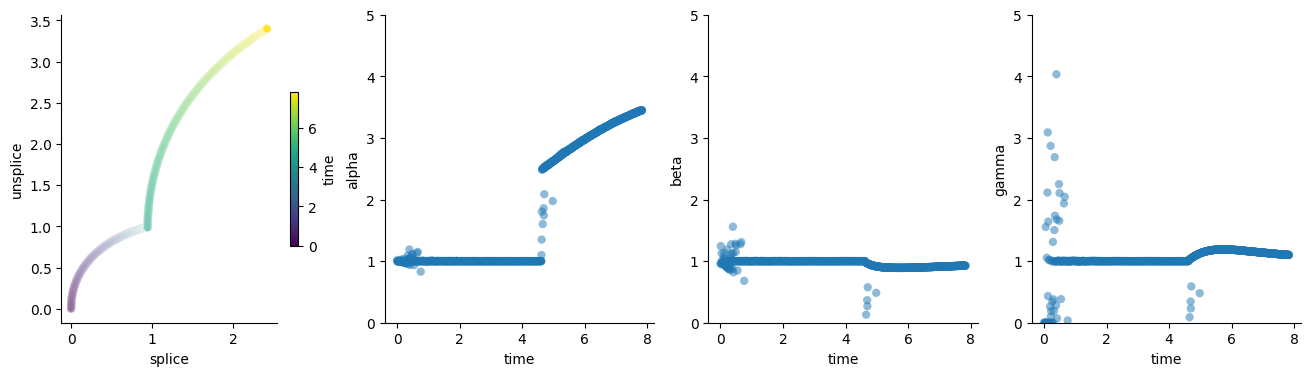

In [43]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.scatterplot(x=gene.splice,
                y=gene.unsplice,
                c=gene.t, alpha=0.5, cmap='viridis', ax=axes[0])
axes[0].set_ylabel('unsplice')
axes[0].set_xlabel('splice')
# axes[0].colorbar(label='time')
# axes[0].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=alpha.reshape(-1),
                edgecolor='none', alpha=0.5, ax=axes[1])
axes[1].set_ylabel('alpha')
axes[1].set_xlabel('time')
axes[1].set_ylim([0, 5])
# axes[1].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=beta.reshape(-1),
                edgecolor='none', alpha=0.5, ax=axes[2])
axes[2].set_ylabel('beta')
axes[2].set_xlabel('time')
axes[2].set_ylim([0, 5])
# axes[2].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=gamma.reshape(-1),
                edgecolor='none', alpha=0.5, ax=axes[3])
axes[3].set_ylabel('gamma')
axes[3].set_xlabel('time')
axes[3].set_ylim([0, 5])
# axes[3].get_legend().remove()

# Remove top and right spines
for j in range(4):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
norm = mpl.colors.Normalize(vmin=gene.t.min(), vmax=gene.t.max())

sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add the color bar
cbar = fig.colorbar(sm, ax=axes[0],shrink=0.5)
cbar.set_label('time')

fig.suptitle('')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.savefig("simu_transboost_cbar.pdf", format='pdf',bbox_inches='tight')
plt.show()

u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.0 u_end 1.98
t1 and t2: 0.0 4.607134081887837
2 1 1


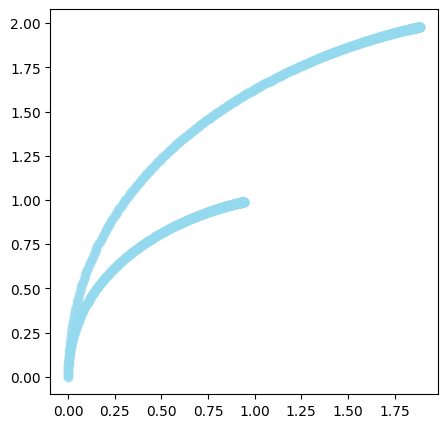

In [34]:
# Multi-lineage forward branching
plt.figure(figsize=(5,5))
gene=simulate(kinetic_type='multi_forward',
                    alpha1=1,
                    alpha2=2,
                    beta1=1,
                    beta2=1,
                    gamma1=1,
                    gamma2=1,
                    path1_pct=99,
                    path2_pct=99,
              path1_cell_number=500,
              path2_cell_number=500,
              noise_level=0.)

plt.scatter(gene.splice,gene.unsplice,c='#95D9EF',alpha=0.5)

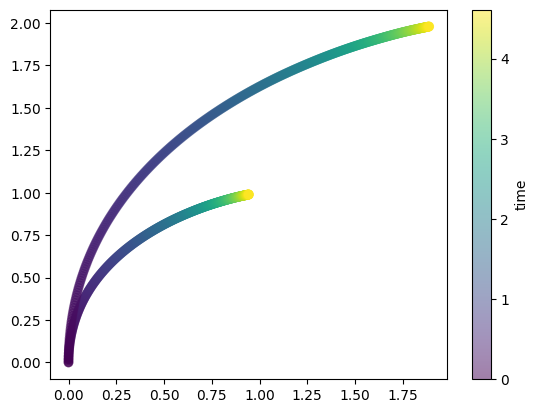

In [35]:
gene['t'] = np.concatenate((np.linspace(0.0, 4.609390362976085, 500), np.linspace(0,4.607134081887837, 500)))
plt.scatter(gene.splice,gene.unsplice,c=gene.t,cmap='viridis',alpha=0.5)
plt.colorbar(label='time')

In [36]:
embedding_array = np.concatenate([gene.embedding1.values.reshape(-1,1), gene.embedding2.values.reshape(-1,1)],axis=1)
from sklearn.neighbors import NearestNeighbors
# Initialize and fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=10)
knn_model.fit(embedding_array)

# Compute the k-nearest neighbors graph
knn_graph = knn_model.kneighbors_graph(embedding_array)

# Convert the sparse matrix to a dense format for display
adj = knn_graph.toarray()

# adj = np.logical_and(adj, adj.T).astype(int)

In [37]:
alpha, beta, gamma = high_resolution_raw(u=gene.unsplice.values.reshape(-1,1),
                                         s=gene.splice.values.reshape(-1,1),
                                         t=gene.t.values,
                                         adj=adj,
                                         optimizer='scipy')

100%|██████████| 1000/1000 [00:04<00:00, 230.69it/s]


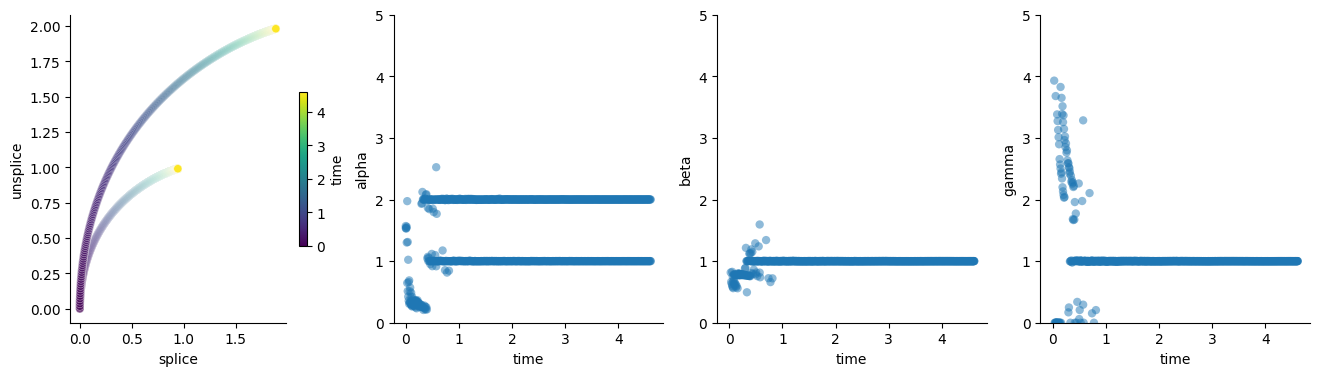

In [38]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.scatterplot(x=gene.splice,
                y=gene.unsplice,
                c=gene.t, alpha=0.5, cmap='viridis', ax=axes[0])
axes[0].set_ylabel('unsplice')
axes[0].set_xlabel('splice')
# axes[0].colorbar(label='time')
# axes[0].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=alpha.reshape(-1),
                edgecolor='none', alpha=0.5, ax=axes[1])
axes[1].set_ylabel('alpha')
axes[1].set_xlabel('time')
axes[1].set_ylim([0, 5])
# axes[1].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=beta.reshape(-1),
                edgecolor='none', alpha=0.5, ax=axes[2])
axes[2].set_ylabel('beta')
axes[2].set_xlabel('time')
axes[2].set_ylim([0, 5])
# axes[2].get_legend().remove()

sns.scatterplot(x=gene.t,
                y=gamma.reshape(-1),
                edgecolor='none', alpha=0.5, ax=axes[3])
axes[3].set_ylabel('gamma')
axes[3].set_xlabel('time')
axes[3].set_ylim([0, 5])
# axes[3].get_legend().remove()

# Remove top and right spines
for j in range(4):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
norm = mpl.colors.Normalize(vmin=gene.t.min(), vmax=gene.t.max())
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)

sm.set_array([])

# Add the color bar
cbar = fig.colorbar(sm, ax=axes[0],shrink=0.5)
cbar.set_label('time')

fig.suptitle('')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.savefig("simu_multiforward_cbar.pdf", format='pdf',bbox_inches='tight')
plt.show()

u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.9899940613860503 u_end 0.009899940613860504
t1 and t2: 0.0 4.609496379596168
0 1 1


100%|██████████| 500/500 [00:02<00:00, 191.02it/s]


u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.9899940613860503 u_end 0.009899940613860504
t1 and t2: 0.0 4.609496379596168
0 1 1


100%|██████████| 500/500 [00:03<00:00, 139.85it/s]


u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.9899940613860503 u_end 0.009899940613860504
t1 and t2: 0.0 4.609496379596168
0 1 1


100%|██████████| 500/500 [00:04<00:00, 105.66it/s]


u_start 0.0 u_end 0.99
t1 and t2: 0.0 4.609390362976085
1 1 1
u_start 0.9899940613860503 u_end 0.009899940613860504
t1 and t2: 0.0 4.609496379596168
0 1 1


100%|██████████| 500/500 [00:06<00:00, 78.96it/s] 


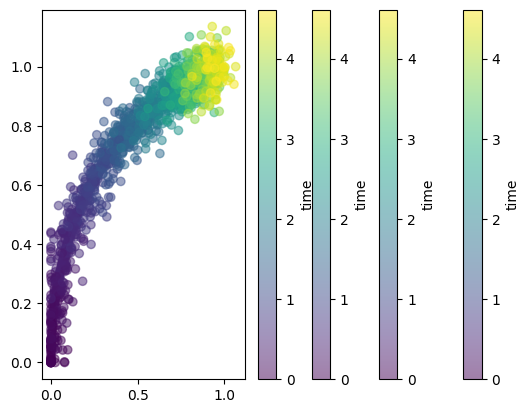

In [19]:
alpha_list = []
beta_list = []
gamma_list = []

for noise in [0, 0.2, 0.4, 0.6]:
    # Mono-kinetic
    gene=simulate(kinetic_type='mono',
                  alpha1=1,
                  alpha2=0,
                  beta1=1,
                  beta2=1,
                  gamma1=1,
                  gamma2=1,
                  path1_pct=99,
                  path2_pct=99,
                  path1_cell_number=500,
                  path2_cell_number=500,
                  noise_level=noise)
    gene['t'] = np.concatenate((np.linspace(0.0, 4.609, 500), np.linspace(4.609, 4.609+4.609, 500)))
    gene = gene.iloc[:500,]
    plt.scatter(gene.splice,gene.unsplice,c=gene.t,cmap='viridis',alpha=0.5)
    plt.colorbar(label='time')
    embedding_array = np.concatenate([gene.embedding1.values.reshape(-1,1), gene.embedding2.values.reshape(-1,1)],axis=1)
    from sklearn.neighbors import NearestNeighbors
    # Initialize and fit the NearestNeighbors model
    knn_model = NearestNeighbors(n_neighbors=10)
    knn_model.fit(embedding_array)

    # Compute the k-nearest neighbors graph
    knn_graph = knn_model.kneighbors_graph(embedding_array)

    # Convert the sparse matrix to a dense format for display
    adj = knn_graph.toarray()

    alpha, beta, gamma = high_resolution_raw(u=gene.unsplice.values.reshape(-1,1),
                                             s=gene.splice.values.reshape(-1,1),
                                             t=gene.t.values,
                                             adj=adj,
                                             optimizer='scipy')
    alpha_list.append(alpha.reshape(-1))
    gamma_list.append(gamma.reshape(-1))
    beta_list.append(beta.reshape(-1))

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
data_0 = {
    'alpha': alpha_list[0],
    'beta': beta_list[0],
    'gamma': gamma_list[0],
    'noise_level': ['0']*500,
}
df_0 = pd.DataFrame(data_0)
# Create DataFrame
data_1 = {
    'alpha': alpha_list[1],
    'beta': beta_list[1],
    'gamma': gamma_list[1],
    'noise_level': ['0.2']*500,
}
df_1 = pd.DataFrame(data_1)
# Create DataFrame
data_2 = {
    'alpha': alpha_list[2],
    'beta': beta_list[2],
    'gamma': gamma_list[2],
    'noise_level': ['0.4']*500,
}
df_2 = pd.DataFrame(data_2)
# Create DataFrame
data_3 = {
    'alpha': alpha_list[3],
    'beta': beta_list[3],
    'gamma': gamma_list[3],
    'noise_level': ['0.6']*500,
}
df_3 = pd.DataFrame(data_3)

# # Create DataFrame
# data_4 = {
#     'alpha': alpha_list[4],
#     'beta': beta_list[4],
#     'gamma': gamma_list[4],
#     'noise': [0.8]*500,
# }
# df_4 = pd.DataFrame(data_4)

In [21]:
df = pd.concat([df_0, df_1, df_2, df_3])

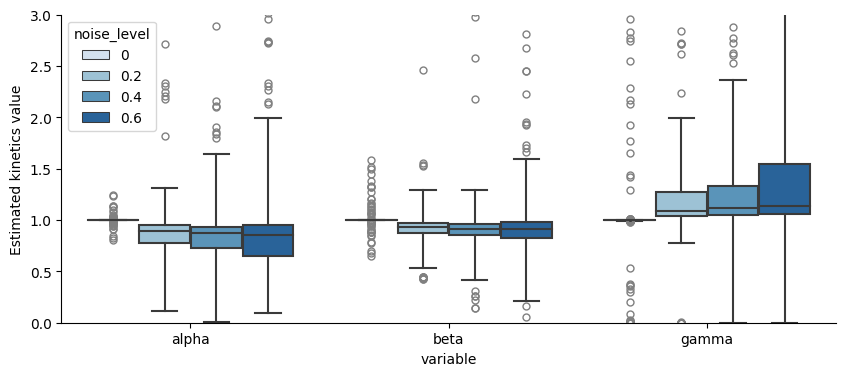

In [24]:
# Reshape the DataFrame
fig, ax= plt.subplots(1, 1, figsize=(10, 4))


colors = sns.color_palette('Blues',4)
palette={'0':colors[0],
         '0.2':colors[1],
         '0.4':colors[2],
         '0.6':colors[3],}

melted_df = df.melt(id_vars=['noise_level'], value_vars=['alpha','beta','gamma'], 
                    var_name='variable', value_name='value')

# Creating the violin plot
sns.boxplot(x='variable', y='value', hue='noise_level', data=melted_df,
            whis=4,palette=palette,
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='gray'),
            ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Estimated kinetics value')
# ax.set_xlabel('')
ax.set_ylim([0, 3])
# ax.get_legend().remove()
plt.savefig("simu_noiselevel_10.pdf", format='pdf',bbox_inches='tight')
plt.show()

In [25]:
import scvelo as scv
# simulate data with time-dep rate
n_obs = 1000
alpha = [2] * 10
gamma = [.5] * 10

# three genes with time-dependent rates
tnew = np.linspace(.1, 5, num=n_obs)
gamma_t = 5 * (1 - np.exp(-.3*tnew))
for i in range(len(gamma)):
    gamma[i] = [.5] * n_obs
for i in [0,1,5]:
    alpha[i] = 5
    gamma[i] = gamma_t

gamma = np.array(gamma)
print(gamma.max())
adata_t = scv.datasets.simulation(n_obs=n_obs, n_vars=10, t_max=25, alpha=alpha, beta=.3, gamma=gamma, noise_level=0.)

3.884349199257851


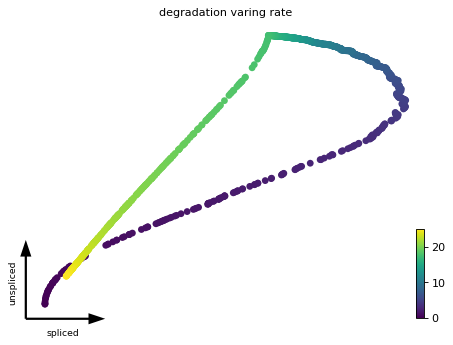

In [26]:
kwargs = dict(c='true_t', cmap='viridis', s=150, use_raw=True, frameon='artist', dpi=80)
scv.pl.scatter(adata_t, basis=adata_t.var_names[5], title='degradation varing rate', **kwargs)

In [27]:
gene = 5
splice = adata_t.layers['spliced'][:,gene]
unsplice = adata_t.layers['unspliced'][:,gene]
t = adata_t.obs['true_t']

In [28]:
embedding_array = np.concatenate([unsplice.reshape(-1,1), splice.reshape(-1,1)],axis=1)
from sklearn.neighbors import NearestNeighbors
# Initialize and fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=10)
knn_model.fit(embedding_array)

# Compute the k-nearest neighbors graph
knn_graph = knn_model.kneighbors_graph(embedding_array)

# Convert the sparse matrix to a dense format for display
adj = knn_graph.toarray()

# adj = np.logical_and(adj, adj.T).astype(int)

In [29]:
alpha, beta, gamma = high_resolution_raw(u=unsplice.reshape(-1,1),
                                         s=splice.reshape(-1,1),
                                         t=t,
                                         adj=adj,
                                         optimizer='scipy')

100%|██████████| 1000/1000 [00:08<00:00, 117.71it/s]


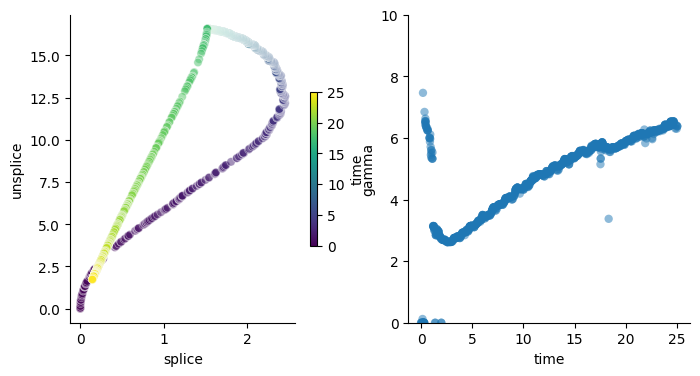

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.scatterplot(x=splice,
                y=unsplice,
                c=t, alpha=0.5, cmap='viridis', ax=axes[0])
axes[0].set_ylabel('unsplice')
axes[0].set_xlabel('splice')
# axes[0].colorbar(label='time')
# axes[0].get_legend().remove()

# sns.scatterplot(x=t,
#                 y=alpha.reshape(-1),
#                 marker='.', edgecolor='none', ax=axes[1])
# axes[1].set_ylabel('alpha')
# axes[1].set_xlabel('time')
# axes[1].set_ylim([0, 10])
# # axes[1].get_legend().remove()

# sns.scatterplot(x=t,
#                 y=beta.reshape(-1),
#                 marker='.', edgecolor='none', ax=axes[2])
# axes[2].set_ylabel('beta')
# axes[2].set_xlabel('time')
# axes[2].set_ylim([0, 5])
# # axes[2].get_legend().remove()

sns.scatterplot(x=t,
                y=gamma.reshape(-1),
                alpha=0.5,
                edgecolor='none', ax=axes[1])
axes[1].set_ylabel('gamma')
axes[1].set_xlabel('time')
axes[1].set_ylim([0, 10])
# axes[3].get_legend().remove()

# Remove top and right spines
for j in range(2):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
# fig.suptitle('time-dependent degradation rate')
norm = mpl.colors.Normalize(vmin=t.min(), vmax=t.max())
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)

sm.set_array([])

# Add the color bar
cbar = fig.colorbar(sm, ax=axes[0],shrink=0.5)
cbar.set_label('time')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.savefig("simu_time-varing-degradation_cbar.pdf", format='pdf',bbox_inches='tight')
plt.show()

In [51]:
# adata

AnnData object with n_obs × n_vars = 1000 × 10
    obs: 'true_t', 'velocity_self_transition'
    var: 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2'
    uns: 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'velocity_pca'
    varm: 'PCs'
    layers: 'unspliced', 'spliced', 'Ms', 'Mu', 'unspliced_velocity', 'spliced_velocity', 'alpha', 'beta', 'gamma', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity graph (using 1/32 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


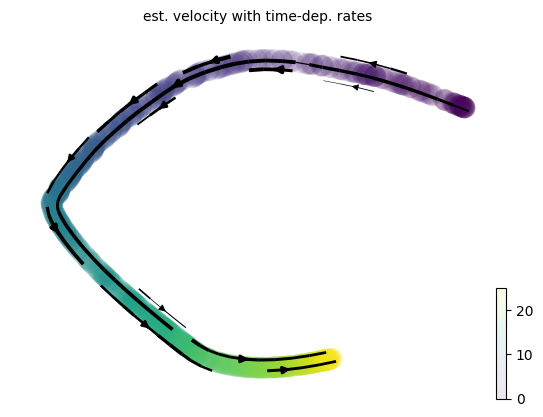

In [66]:
# scv.pp.pca(adata_t)
# scv.tl.velocity_graph(adata_t,vkey='spliced_velocity')
# kwargs = dict(linewidth=1.5, density=.8, color='true_t', frameon=False, cmap='viridis', add_margin=.1, alpha=.1)
# scv.pl.velocity_embedding_stream(adata_t, basis='pca',vkey='spliced_velocity', title='est. velocity with time-dep. rates', **kwargs)

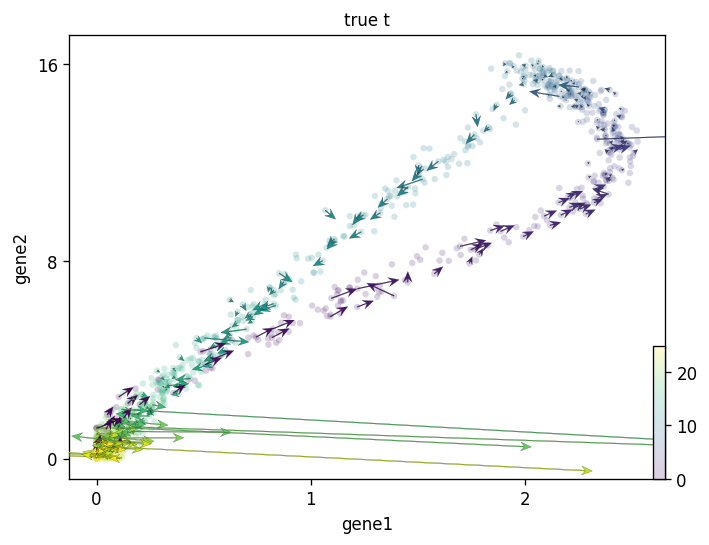

In [55]:
# import scanpy as sc
# gene = 0
# x = np.array(adata_t.layers['spliced'][:, gene]).reshape(-1, 1)
# y = np.array(adata_t.layers['unspliced'][:, gene]).reshape(-1, 1)

# x_v = np.array(adata_t.layers['spliced_velocity'][:, gene]).reshape(-1, 1)
# y_v = np.array(adata_t.layers['unspliced_velocity'][:, gene]).reshape(-1, 1)

# X = np.concatenate((x, y), axis=1)
# V = np.concatenate((x_v, y_v), axis=1)

# adata_new = sc.AnnData(X=X, obs=adata_t.obs)
# adata_new.layers['Ms'] = X
# adata_new.obsm['X_gene'] = X
# adata_new.layers['gene_velocity'] = V

# scv.pl.velocity_embedding(adata_new, basis='gene', X=X, V=V, c='true_t', vkey='gene_velocity',
#                           width=.0015,arrow_length=1e-1,density=0.3,
#                           dpi=120)